In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [0]:
def change(coin:list, amount: int) :
    row = len(coin)
    col = amount + 1
    table = (row,col)
    matrix = np.zeros(table)
    
    I = 0
    for I in range(col):  #isi baris ke 0 dengan I semua
        matrix[0][I] = int(I)
    
    i = 1                 # isi sisa matrix
    while (i < row) :
        j = 1
        while (j <col):
            if (j < coin[i]) :
                matrix[i][j] = int(matrix[i-1][j])
            else :
                matrix[i][j] = min(int(matrix[i-1][j]), int(matrix[i][j - coin[i]] + 1))
            j+=1
        i+=1

    df = pd.DataFrame(matrix)
    w = col + 10
    h = row + 10
    plt.figure(1, figsize=(w, h))
    tb = plt.table(cellText=matrix, loc=(0,0), cellLoc='center')

    tc = tb.properties()['child_artists']
    for cell in tc: 
        cell.set_height(1.0/row)
        cell.set_width(1.0/col)

    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
#     ax = sns.heatmap(matrix, annot=True, fmt="f")

    plt.show()    
        
#     print(matrix)
    print("koin minimum : ", end = '')
    print(int(matrix[row-1][col-1]))

    a = row - 1             # output koin koin yang dipilih
    b = col - 1
    count = 0
    print("Koin-koin yang ditukarkan : ", end = '')
    while (a > 0 and b > 0) :
        if (matrix[a-1][b] == matrix[a][b]) :
            a -= 1
            continue
        print(coin[a], end = ' ')
        b -= coin[a]
        amount -= coin[a]
        count += 1

    if (count != matrix[row-1][col-1]) :
        print(coin[a])
        amount -= coin[a]

    if (amount != 0) :
        print("koin tidak bisa ditukar")


Berapa koin yang ingin ditukar : 11
Ada berapa jenis koin yang tersedia : 5
Input koin : 1
Input koin : 2
Input koin : 3
Input koin : 4
Input koin : 5


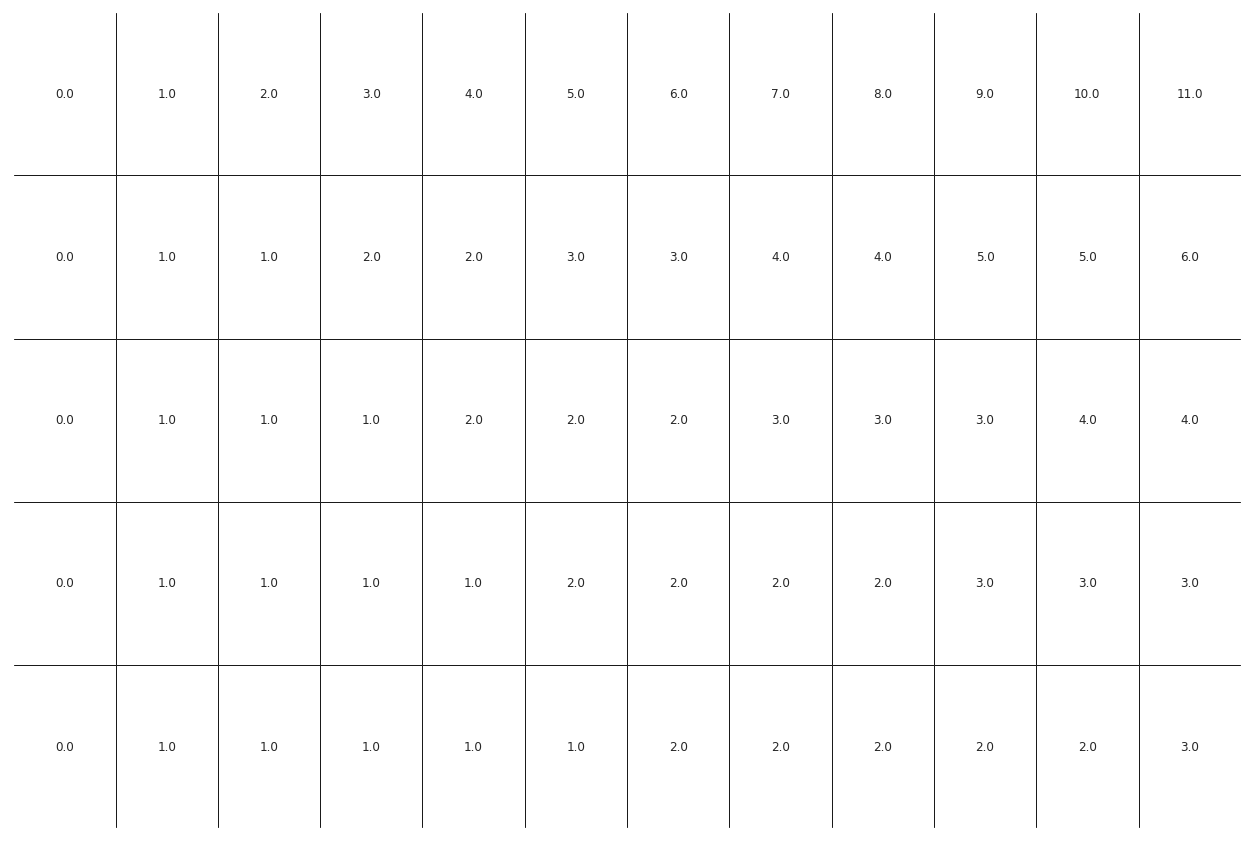

koin minimum : 3
Koin-koin yang ditukarkan : 4 4 3 

In [5]:
amount = int (input("Berapa koin yang ingin ditukar : "))
n = int(input("Ada berapa jenis koin yang tersedia : "))
coin = []
for x in range(n):
    coin.append(int(input("Input koin : ")))
                
change(coin, amount)